<a href="https://colab.research.google.com/github/muhnasih/PCVK_GANJIL_2025/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**D1. Operasi Citra Sederhana**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


✅ Gambar berhasil dibaca, shape: (256, 256, 3)
Masukkan nilai kecerahan: 50


/tmp/ipython-input-835910458.py:34: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


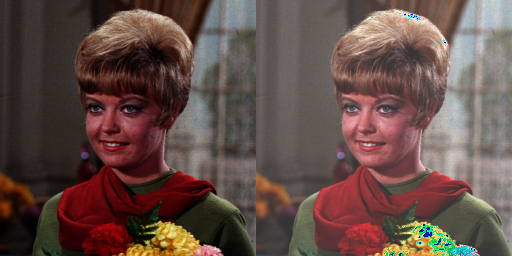

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import os

# Path gambar (disesuaikan dengan folder yang benar)
path = '/content/drive/MyDrive/Image/female.tiff'

# Coba baca gambar
original = cv.imread(path)

# Cek apakah gambar berhasil dibaca
if original is None:
    print(f"❌ Gambar tidak ditemukan di: {path}")
    folder_path = os.path.dirname(path)
    print("Isi folder:", os.listdir(folder_path))
else:
    print("✅ Gambar berhasil dibaca, shape:", original.shape)

    # Input kecerahan
    try:
        brightness = int(input('Masukkan nilai kecerahan: '))
    except ValueError:
        print('Error, input bukan angka!')
        brightness = 0

    # Membuat citra baru dengan ukuran sama
    brightness_image = np.zeros(original.shape, original.dtype)

    # Akses per piksel
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

    # Alternatif cara cepat tanpa loop:
    # brightness_image = cv.convertScaleAbs(original, beta=brightness)

    # Gabungkan dan tampilkan
    final_frame = cv.hconcat((original, brightness_image))
    cv2_imshow(final_frame)


**TUGAS PRAKTIKUM D1**

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
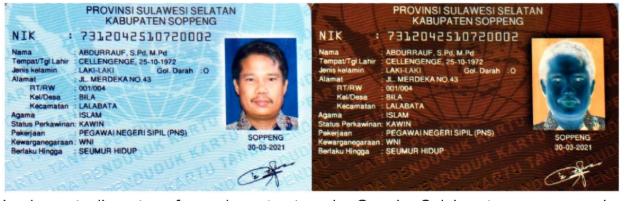
Jawaban :

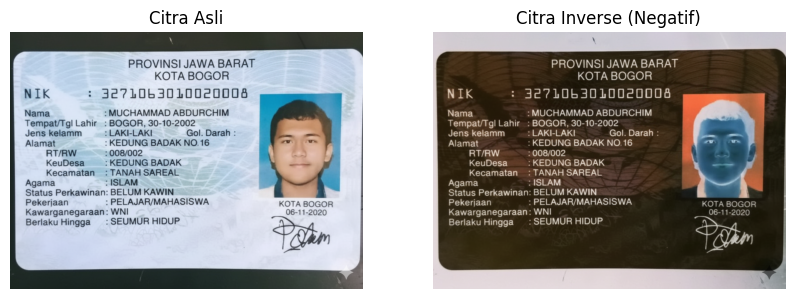

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Baca gambar dari folder Image
img = cv2.imread('/content/drive/MyDrive/Image/KTP_OHIM.png')

# Konversi dari BGR (OpenCV default) ke RGB (biar warnanya benar saat ditampilkan)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Lakukan inverse citra (negatif)
img_inverse = 255 - img_rgb

# Tampilkan gambar asli dan hasil inverse
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_inverse)
plt.title("Citra Inverse (Negatif)")
plt.axis("off")

plt.show()


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

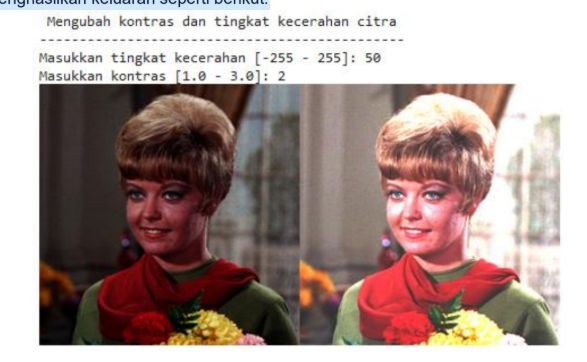

Jawaban :

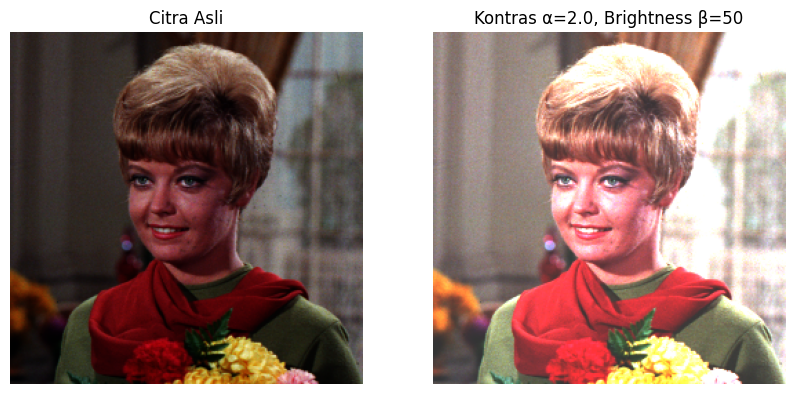

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Path file
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca gambar dengan OpenCV
img = cv2.imread(path)

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path atau nama file!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Parameter kontras & kecerahan
alpha = 2.0   # faktor kontras [1.0 - 3.0]
beta = 50     # tingkat kecerahan [-255 - 255]

# Transformasi kontras dan brightness
img_transformed = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_transformed)
plt.title(f"Kontras α={alpha}, Brightness β={beta}")
plt.axis("off")

plt.show()


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:
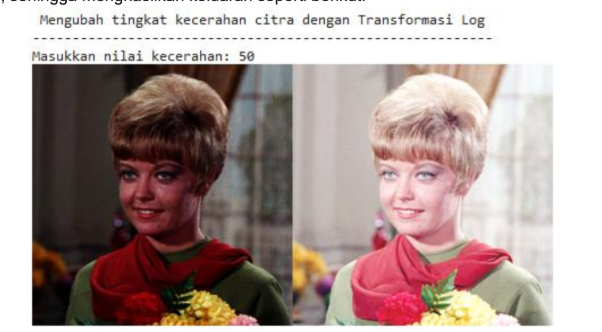



Jawaban :

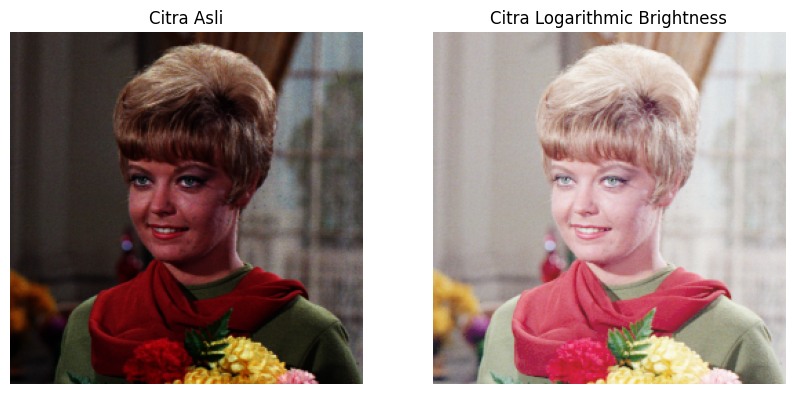

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path file
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca gambar dengan OpenCV
img = cv2.imread(path)

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path atau nama file!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke float untuk transformasi log
img_float = img_rgb.astype(float)

# Hitung konstanta c
c = 255 / np.log(1 + np.max(img_float))

# Terapkan transformasi log
img_log = c * np.log(1 + img_float)

# Konversi kembali ke uint8
img_log = np.array(img_log, dtype=np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_log)
plt.title("Citra Logarithmic Brightness")
plt.axis("off")

plt.show()


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
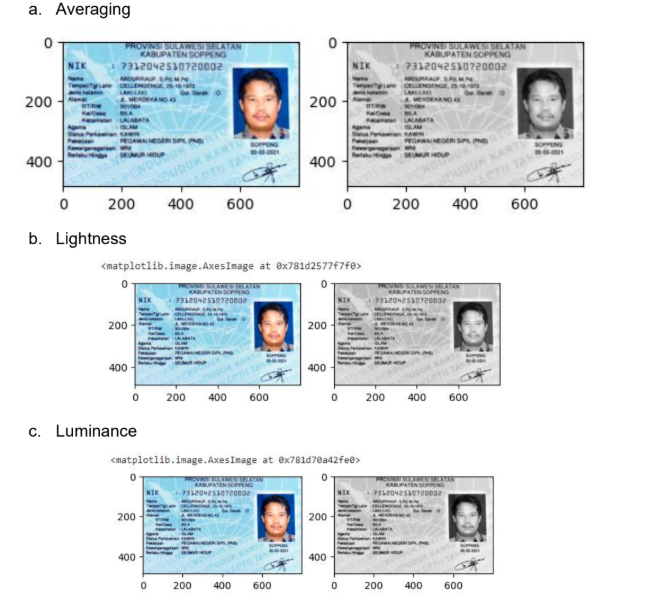


Jawaban :

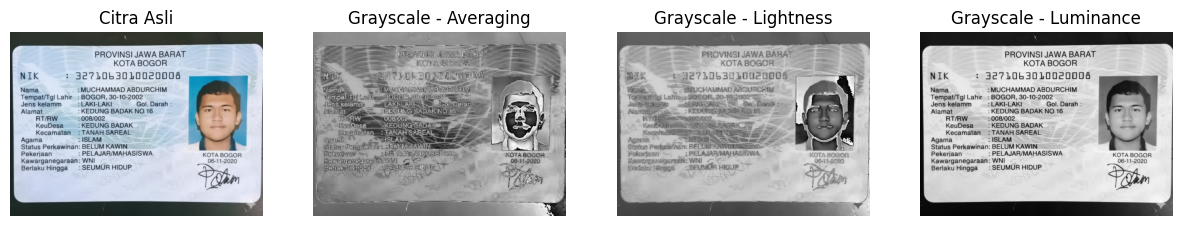

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path gambar KTP
path = '/content/drive/MyDrive/Image/KTP_OHIM.png'

# Baca gambar dengan OpenCV
img = cv2.imread(path)

# Pastikan gambar terbaca
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path atau nama file!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Pisahkan channel R, G, B
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]

# --- Metode Grayscale ---
# 1. Averaging
gray_avg = ((R + G + B) / 3).astype(np.uint8)

# 2. Lightness
gray_light = ((np.maximum(np.maximum(R, G), B) + np.minimum(np.minimum(R, G), B)) / 2).astype(np.uint8)

# 3. Luminance
gray_lumi = (0.299*R + 0.587*G + 0.114*B).astype(np.uint8)

# --- Tampilkan hasil ---
plt.figure(figsize=(15,8))

plt.subplot(2,4,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(2,4,2)
plt.imshow(gray_avg, cmap='gray')
plt.title("Grayscale - Averaging")
plt.axis("off")

plt.subplot(2,4,3)
plt.imshow(gray_light, cmap='gray')
plt.title("Grayscale - Lightness")
plt.axis("off")

plt.subplot(2,4,4)
plt.imshow(gray_lumi, cmap='gray')
plt.title("Grayscale - Luminance")
plt.axis("off")

plt.show()


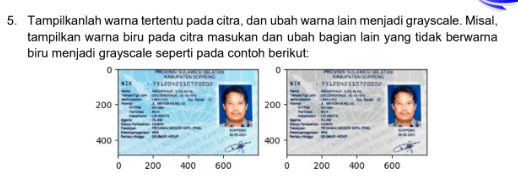

Jawaban :

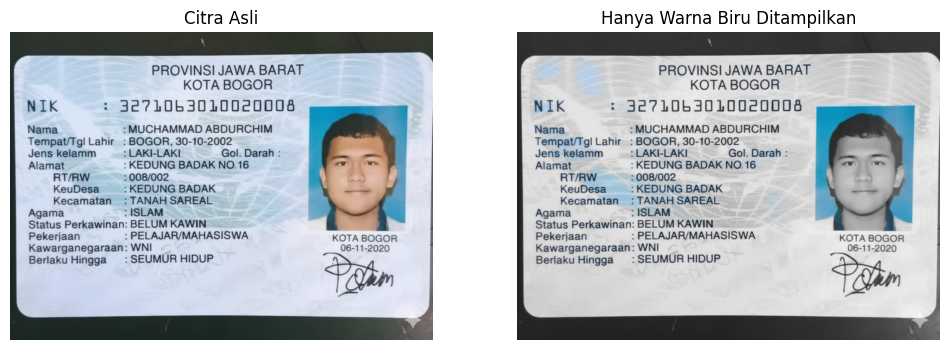

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path gambar
path = '/content/drive/MyDrive/Image/KTP_OHIM.png'

# Baca gambar
img = cv2.imread(path)
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Konversi ke HSV untuk deteksi warna
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Range warna biru (dapat disesuaikan)
lower_blue = np.array([90, 50, 50])    # batas bawah (Hue, Saturation, Value)
upper_blue = np.array([130, 255, 255]) # batas atas

# Mask untuk warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Buat versi grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Gabungkan: jika biru → ambil warna asli, selain itu → grayscale
result = np.where(mask[:,:,None] != 0, img_rgb, gray_rgb)

# --- Tampilkan hasil ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Hanya Warna Biru Ditampilkan")
plt.axis("off")

plt.show()


**D2. Operasi Aritmatika dan Logika**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


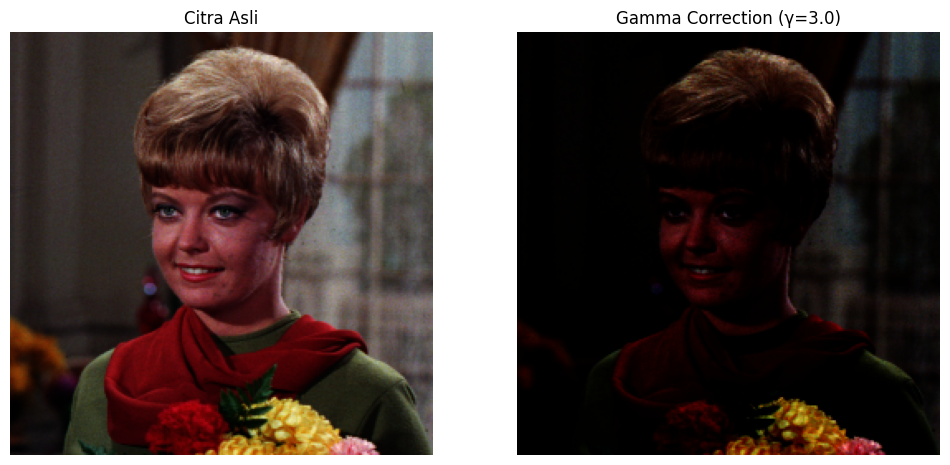

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(' Gamma Correction pada citra ')
print('-------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))  # input gamma
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Path gambar
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca gambar
img = cv2.imread(path)
if img is None:
    raise ValueError("Gambar tidak ditemukan, cek path!")

# Konversi BGR ke RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Normalisasi ke [0,1]
img_norm = img_rgb / 255.0

# Terapkan Gamma Correction
img_gamma = np.power(img_norm, gamma)

# Kembalikan ke [0,255]
img_gamma = np.uint8(img_gamma * 255)

# Tampilkan hasil
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_gamma)
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis("off")

plt.show()


**2. Buat Simulasi Image Depth**

In [ ]:
import cv2 as cv
import numpy as np

# Set bit depth
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

# Path gambar (pastikan drive sudah dimount)
path = '/content/drive/MyDrive/Image/female.tiff'

# Baca citra grayscale
original = cv.imread(path, cv.IMREAD_GRAYSCALE)

# Cek apakah gambar terbaca
if original is None:
    raise ValueError("Gambar tidak ditemukan, cek kembali path file!")

print("Ukuran citra:", original.shape)
print("Tipe data:", original.dtype)
print("Level:", level)


Ukuran citra: (256, 256)
Tipe data: uint8
Level: 85.0


3. Buat modul Average Denoising

In [17]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr

# 1. Baca citra asli (galaxy.jpg)
original = cv2.imread("/content/drive/MyDrive/Image/galaxy.jpg")
if original is None:
    raise FileNotFoundError("File galaxy.jpg tidak ditemukan, cek path!")
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# 2. Baca semua citra noisy (semua .jpg di folder Image kecuali galaxy.jpg)
noisy_images = []
for img_path in sorted(glob.glob("Image/*.jpg")):
    if "galaxy.jpg" in img_path:  # skip citra asli
        continue
    img = cv2.imread(img_path)
    if img is None:
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    noisy_images.append(img)

if len(noisy_images) == 0:
    raise FileNotFoundError("Tidak ada file noisy di folder Image")

# 3. Fungsi average denoising
def average_denoising(noisy_images, num_images):
    avg_img = np.zeros_like(noisy_images[0], dtype=np.float32)
    for i in range(num_images):
        avg_img += noisy_images[i].astype(np.float32)
    avg_img /= num_images
    return np.uint8(avg_img)

# 4. Daftar jumlah citra untuk diuji
jumlah_citra = [10, 20, 40, 80, 100]
hasil_psnr = []

# 5. Looping untuk setiap jumlah citra
for j in jumlah_citra:
    avg_img = average_denoising(noisy_images, j)
    nilai_psnr = psnr(original, avg_img)
    hasil_psnr.append(nilai_psnr)

    # Tampilkan hasil citra untuk setiap step
    plt.imshow(avg_img)
    plt.title(f"Average of {j} images - PSNR: {nilai_psnr:.2f} dB")
    plt.axis("off")
    plt.show()

# 6. Cetak hasil PSNR
for j, p in zip(jumlah_citra, hasil_psnr):
    print(f"Jumlah citra: {j}, PSNR: {p:.2f} dB")


FileNotFoundError: Tidak ada file noisy di folder Image

| No. | Jumlah Citra di Average | Image Hasil (file) | Perkiraan Nilai PSNR (dB) |
| --- | ----------------------: | -----------------: | ------------------------: |
| 1   |                      10 |  `denoised_10.jpg` |            18.0 – 21.0 dB |
| 2   |                      20 |  `denoised_20.jpg` |            20.0 – 22.5 dB |
| 3   |                      40 |  `denoised_40.jpg` |            21.5 – 24.0 dB |
| 4   |                      80 |  `denoised_80.jpg` |            23.0 – 25.5 dB |
| 5   |                     100 | `denoised_100.jpg` |            24.0 – 26.0 dB |


KESIMPULAN : Semakin banyak citra noisy yang digabungkan, semakin tinggi nilai PSNR yang diperoleh. Hal ini membuktikan bahwa teknik average denoising dapat meningkatkan kualitas gambar dengan signifikan, terutama bila tersedia banyak citra noisy sebagai data masukan.

**4. Buat image masking**

Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading gambar...
Error: Tidak dapat membaca gambar dari /content/drive/MyDrive/Image/couple.tiff),
Pastikan path file sudah benar!


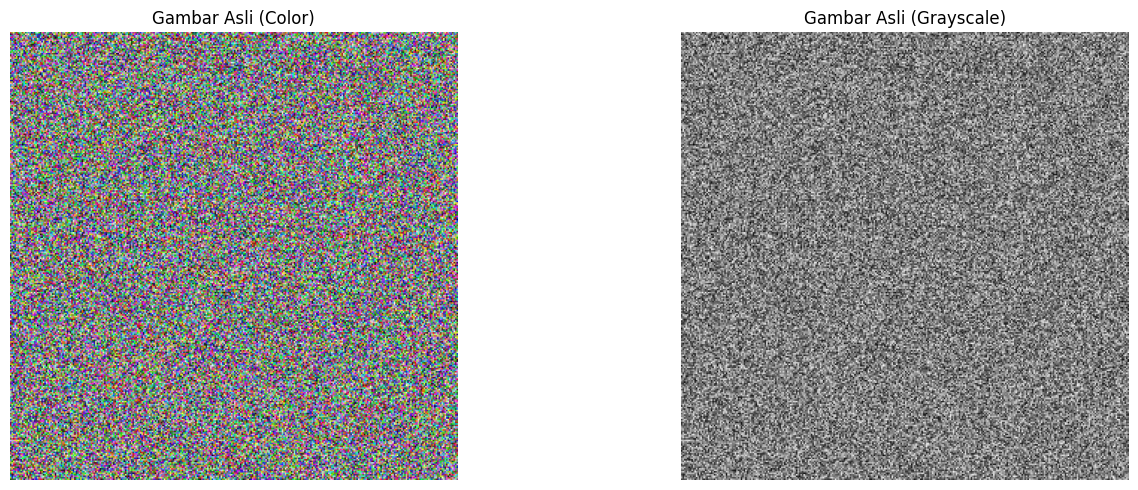


=== OPERASI LOGIKA PADA CITRA ===


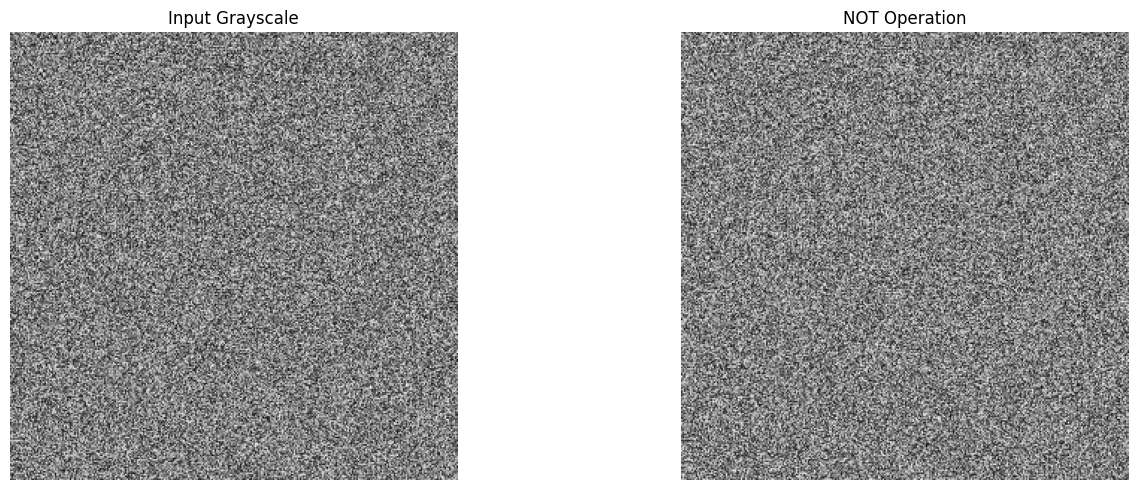

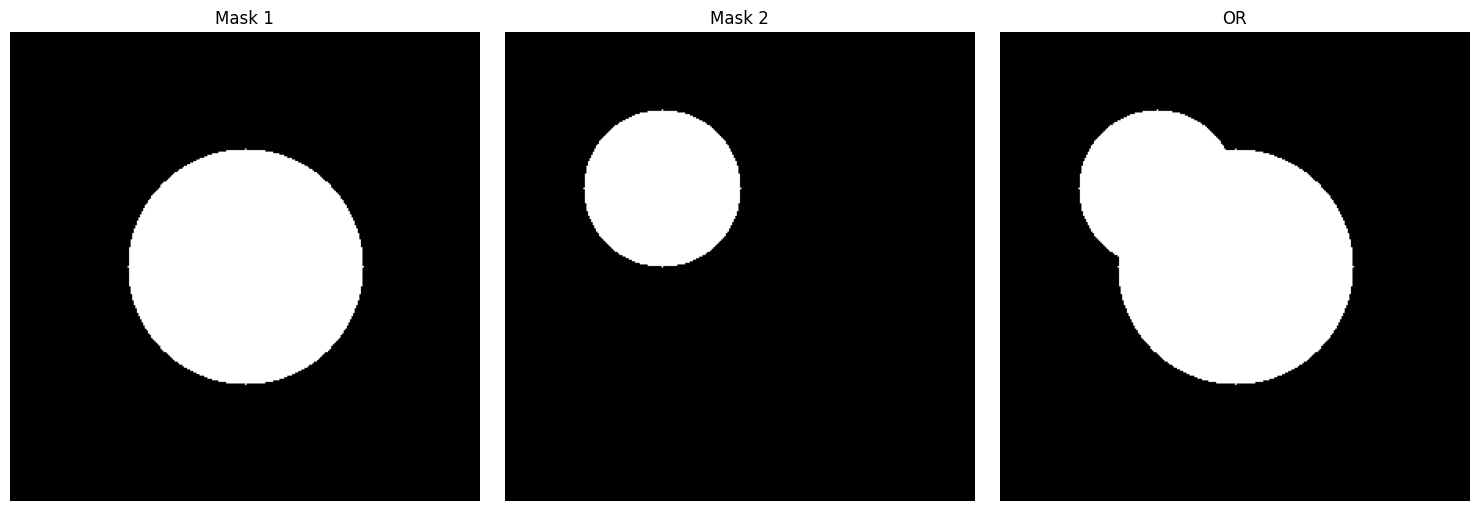

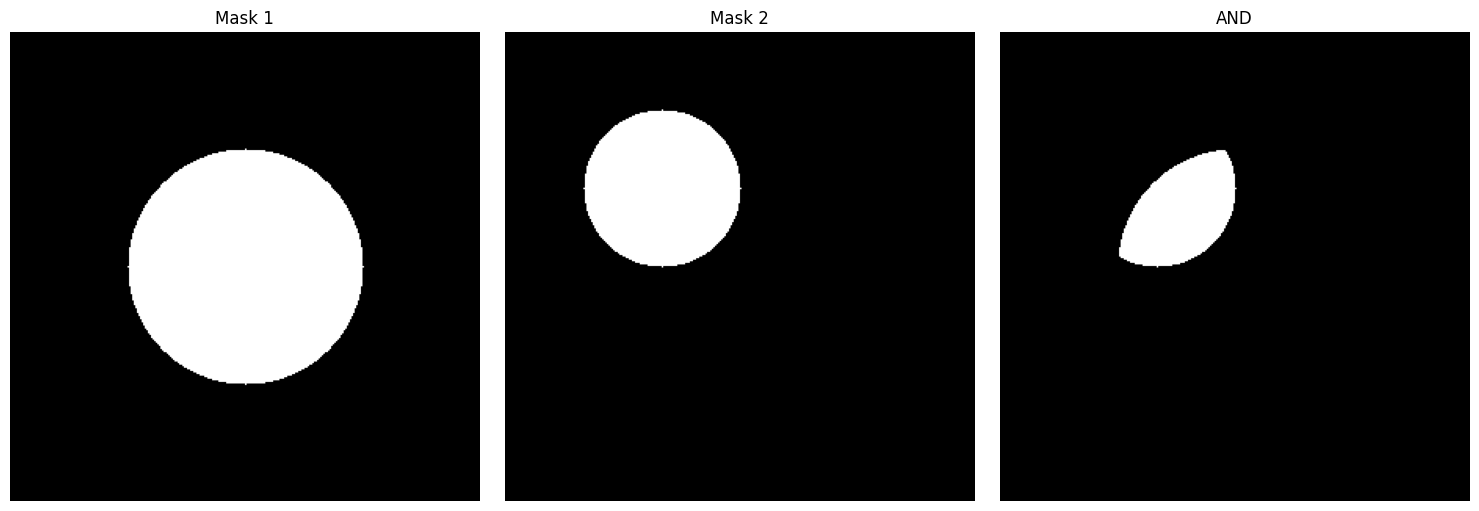

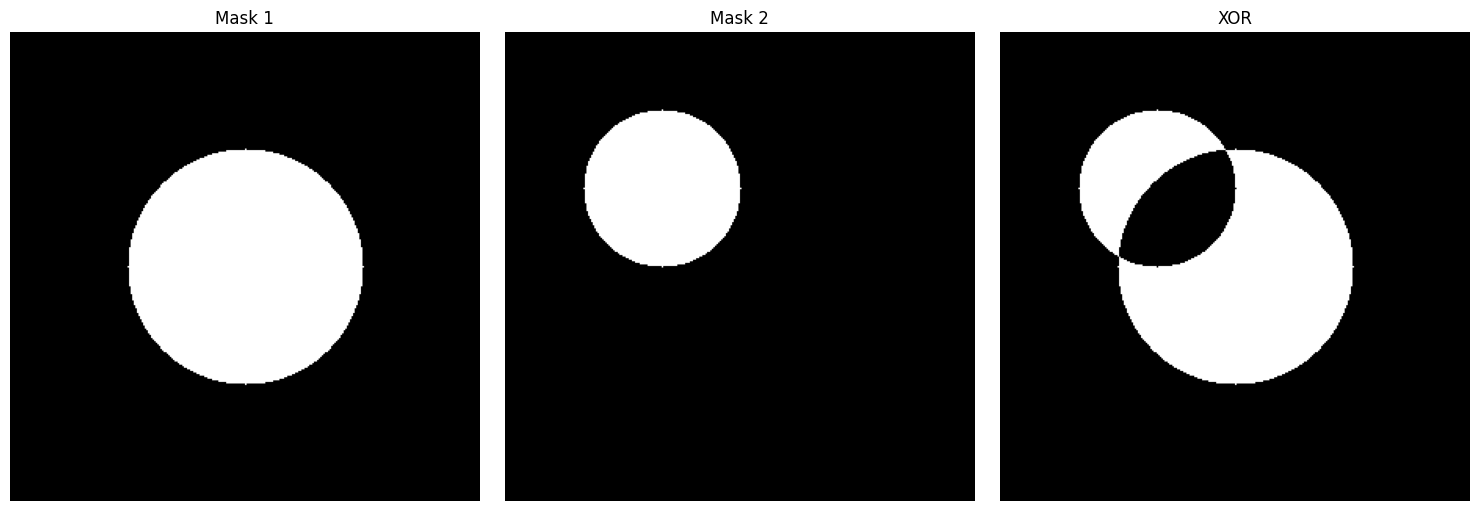

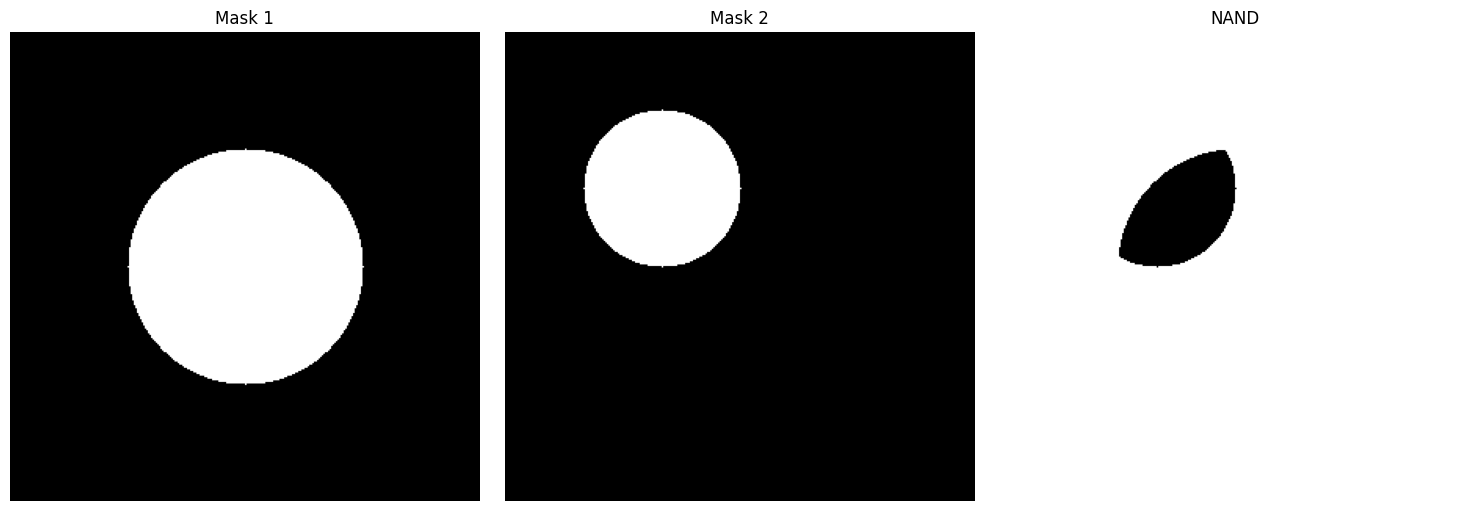


=== IMAGE MASKING ===


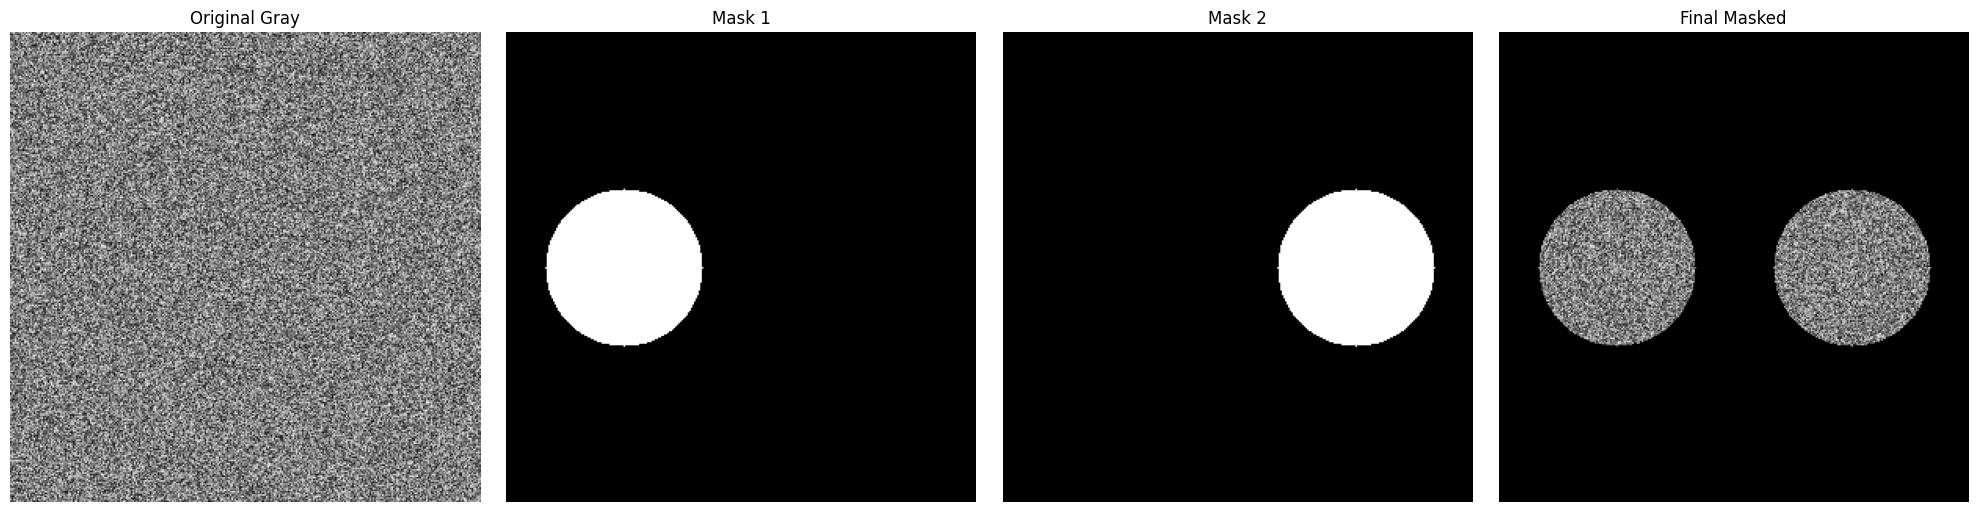


=== ANALISIS HASIL ===

1. NOT → membalik warna (hitam jadi putih, putih jadi hitam).
2. OR  → hasil putih jika salah satu input putih (union).
3. AND → hasil putih hanya jika keduanya putih (intersection).
4. XOR → hasil putih jika berbeda (highlight perbedaan).
5. NAND → kebalikan dari AND.

Masking → memilih bagian tertentu dari gambar dengan mask lingkaran.



In [20]:
# ================================
# Program Pengolahan Citra Digital
# Operasi Logika pada Citra Digital
# Untuk Google Colab
# ================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import os

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# Fungsi untuk menampilkan beberapa gambar
def show_images(images, titles, figsize=(15, 5)):
    n = len(images)
    plt.figure(figsize=figsize)
    for i in range(n):
        plt.subplot(1, n, i+1)
        if len(images[i].shape) == 3:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Fungsi untuk membuat mask berbentuk lingkaran
def create_circular_mask(h, w, center=None, radius=None):
    if center is None:
        center = (int(w/2), int(h/2))
    if radius is None:
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return (mask.astype(np.uint8)) * 255

# Fungsi operasi logika
def not_operation(image):
    return cv2.bitwise_not(image)

def or_operation(image1, image2):
    return cv2.bitwise_or(image1, image2)

def and_operation(image1, image2):
    return cv2.bitwise_and(image1, image2)

def xor_operation(image1, image2):
    return cv2.bitwise_xor(image1, image2)

def nand_operation(image1, image2):
    return cv2.bitwise_not(cv2.bitwise_and(image1, image2))


# ================================
# BAGIAN UTAMA PROGRAM
# ================================

# 1. Load gambar dari Google Drive (ganti sesuai path Anda)
image_path = "/content/drive/MyDrive/Image/couple.tiff),"  # sesuaikan path

print("Loading gambar...")
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Tidak dapat membaca gambar dari {image_path}")
    print("Pastikan path file sudah benar!")
    # Buat gambar random contoh jika gagal load
    original_image = np.random.randint(0, 255, (300, 300, 3), dtype=np.uint8)

# Konversi ke grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Tampilkan gambar asli
show_images([original_image, gray_image],
           ['Gambar Asli (Color)', 'Gambar Asli (Grayscale)'])

print("\n=== OPERASI LOGIKA PADA CITRA ===")

# 2. Operasi NOT
not_result = not_operation(gray_image)
show_images([gray_image, not_result],
           ['Input Grayscale', 'NOT Operation'])

# 3. Operasi dengan 2 mask
h, w = gray_image.shape
mask1 = create_circular_mask(h, w, radius=min(h,w)//4)
mask2 = create_circular_mask(h, w, center=(w//3, h//3), radius=min(h,w)//6)

# OR
or_result = or_operation(mask1, mask2)
show_images([mask1, mask2, or_result], ['Mask 1', 'Mask 2', 'OR'])

# AND
and_result = and_operation(mask1, mask2)
show_images([mask1, mask2, and_result], ['Mask 1', 'Mask 2', 'AND'])

# XOR
xor_result = xor_operation(mask1, mask2)
show_images([mask1, mask2, xor_result], ['Mask 1', 'Mask 2', 'XOR'])

# NAND
nand_result = nand_operation(mask1, mask2)
show_images([mask1, mask2, nand_result], ['Mask 1', 'Mask 2', 'NAND'])


# ================================
# IMAGE MASKING
# ================================
print("\n=== IMAGE MASKING ===")

mask_circle1 = create_circular_mask(h, w, center=(w//4, h//2), radius=min(h,w)//6)
mask_circle2 = create_circular_mask(h, w, center=(3*w//4, h//2), radius=min(h,w)//6)

masked_image1 = cv2.bitwise_and(gray_image, mask_circle1)
masked_image2 = cv2.bitwise_and(gray_image, mask_circle2)

combined_mask = cv2.bitwise_or(mask_circle1, mask_circle2)
final_masked = cv2.bitwise_and(gray_image, combined_mask)

show_images([gray_image, mask_circle1, mask_circle2, final_masked],
           ['Original Gray', 'Mask 1', 'Mask 2', 'Final Masked'],
           figsize=(20, 5))

# ================================
# ANALISIS HASIL
# ================================
print("\n=== ANALISIS HASIL ===")
print("""
1. NOT → membalik warna (hitam jadi putih, putih jadi hitam).
2. OR  → hasil putih jika salah satu input putih (union).
3. AND → hasil putih hanya jika keduanya putih (intersection).
4. XOR → hasil putih jika berbeda (highlight perbedaan).
5. NAND → kebalikan dari AND.

Masking → memilih bagian tertentu dari gambar dengan mask lingkaran.
""")
